# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from config import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

for i in range(len(cities)):
    cities[i] = cities[i].title()
    
# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")



Number of cities in the list: 626


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL\
url = "http://api.openweathermap.org/data/2.5/weather?q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i , city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}{cities[i]}&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        response = requests.get(city_url).json() # Parse the JSON and retrieve data

        city_weather = response["weather"][0]["main"]
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date

        city_lat = response["coord"]["lat"]  
        city_lng = response["coord"]["lon"]         
        city_max_temp = (response["main"]["temp_max"] - 273) 
        city_humidity = response["main"]["humidity"]    
        city_clouds = response["clouds"]["all"]    
        city_wind = response["wind"]["speed"]       
        city_country = response["sys"]["country"]
        city_date = response["dt"] 

        # Append the City information into city_data list
        city_data.append({"City": city, 
                            "Lat": city_lat, 
                            "Lng": city_lng, 
                            "Max Temp": city_max_temp,
                            "Humidity": city_humidity,
                            "Cloudiness": city_clouds,
                            "Wind Speed": city_wind,
                            "Country": city_country,
                            "Date": city_date
                            })

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | Ontario
Processing Record 2 of Set 1 | La Fleche
Processing Record 3 of Set 1 | Bandarbeyla
Processing Record 4 of Set 1 | Bambous Virieux
Processing Record 5 of Set 1 | Punta Arenas
Processing Record 6 of Set 1 | Narasannapeta
Processing Record 7 of Set 1 | Necochea
Processing Record 8 of Set 1 | Katsuura
Processing Record 9 of Set 1 | Ushuaia
Processing Record 10 of Set 1 | Victoria
Processing Record 11 of Set 1 | Warrnambool
Processing Record 12 of Set 1 | Grand Gaube
Processing Record 13 of Set 1 | Cape Town
Processing Record 14 of Set 1 | Slobidka
Processing Record 15 of Set 1 | Tura
Processing Record 16 of Set 1 | Taolanaro
City not found. Skipping...
Processing Record 17 of Set 1 | Bengkulu
Processing Record 18 of Set 1 | Samthar
Processing Record 19 of Set 1 | Mutata
Processing Record 20 of Set 1 | Chihuahua
Processing Record 21 of Set 1 | Bo Rai
Processing Record 22 of Set 1 | Albany
Pro

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          574
Lat           574
Lng           574
Max Temp      574
Humidity      574
Cloudiness    574
Wind Speed    574
Country       574
Date          574
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ontario,34.0633,-117.6509,10.76,73,75,2.24,US,1674101825
1,La Fleche,47.6982,-0.0755,1.25,94,16,3.07,FR,1674102059
2,Bandarbeyla,9.4942,50.8122,24.16,71,38,8.22,SO,1674102060
3,Bambous Virieux,-20.3428,57.7575,27.49,94,75,5.14,MU,1674102061
4,Punta Arenas,-53.1500,-70.9167,12.21,76,0,5.14,CL,1674102061


In [20]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Ontario,34.0633,-117.6509,10.76,73,75,2.24,US,1674101825
1,La Fleche,47.6982,-0.0755,1.25,94,16,3.07,FR,1674102059
2,Bandarbeyla,9.4942,50.8122,24.16,71,38,8.22,SO,1674102060
3,Bambous Virieux,-20.3428,57.7575,27.49,94,75,5.14,MU,1674102061
4,Punta Arenas,-53.1500,-70.9167,12.21,76,0,5.14,CL,1674102061


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

Plot for Latitude vs Max Temp
---------------------------------------------------


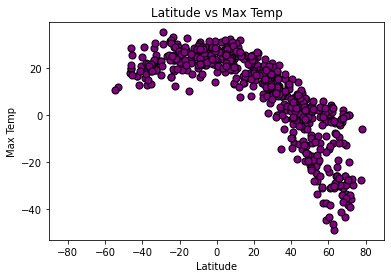

Plot for Latitude vs Humidity
---------------------------------------------------


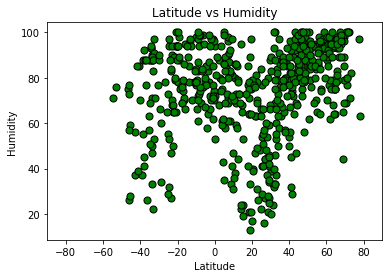

Plot for Latitude vs Cloudiness
---------------------------------------------------


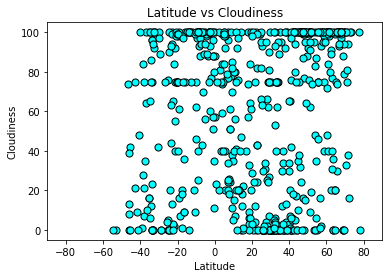

Plot for Latitude vs Wind Speed
---------------------------------------------------


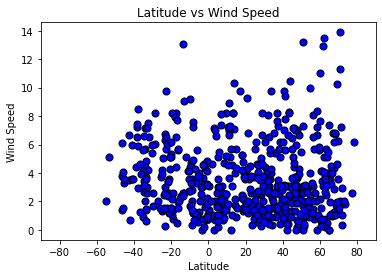

In [8]:
#Latitude vs. Temperature
x_values = city_data_df["Lat"]
chart_ylabels = ["Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
chart_colours = ["purple", "green", "cyan", "blue"]

for index, y_variable in enumerate(chart_ylabels):
    y_values = city_data_df[y_variable]

    plt.scatter(
        x_values,
        y_values,
        color = chart_colours[index],
        marker = 'o',
        s = 50,
        edgecolors = 'black')
    plt.xlabel('Latitude')
    plt.ylabel(y_variable)
    plt.title(f"Latitude vs {y_variable}")
    plt.xlim(-90, 90)

    plt.savefig(f"output_data/Fig{index + 1}.png")
    print(f"Plot for Latitude vs {y_variable}")
    print('---------------------------------------------------')
    plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [9]:
# Define a function to create Linear Regression plots
def create_plot(df, y_variable):

    x_values = df["Lat"]
    
    #get plot axis range for annotation location.
    ymin = df[y_variable].min()
    xmin = df["Lat"].min()

    ymax = df[y_variable].max()
    xmax = df["Lat"].max()

    y_values = df[y_variable]
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(
        x_values,
        y_values,
        color = 'blue',
        marker = 'o',
        s = 50,
        edgecolors = 'black')

    plt.plot(x_values, regress_values, "r-", linewidth = 1)
    #plt.annotate(line_eq, (xmin + 1, ymin + 5), fontsize =10, color = "red")
    plt.xlabel('Latitude')
    plt.ylabel(y_variable)
    plt.suptitle(f"The r-value is: {rvalue}", fontsize = 8, x = 0.2, y = 0.95)
    plt.annotate(line_eq, xy=(0.8, 1.05), fontsize =8, color = "red",
             xycoords='axes fraction', textcoords='axes fraction')
    if xmin >= 0:
        plt.xlim(-5, xmax + 5)
    else:
        plt.xlim(xmin - 5, 5)
    plt.show()

In [10]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.query('Lat >= 0')

northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Ontario,34.0633,-117.6509,10.76,73,75,2.24,US,1674101825
1,La Fleche,47.6982,-0.0755,1.25,94,16,3.07,FR,1674102059
2,Bandarbeyla,9.4942,50.8122,24.16,71,38,8.22,SO,1674102060
5,Narasannapeta,18.4167,84.0500,25.22,64,9,1.36,IN,1674102062
7,Katsuura,35.1333,140.3000,8.34,76,100,6.79,JP,1674101980


In [11]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.query('Lat <= 0')

southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,Bambous Virieux,-20.3428,57.7575,27.49,94,75,5.14,MU,1674102061
4,Punta Arenas,-53.1500,-70.9167,12.21,76,0,5.14,CL,1674102061
6,Necochea,-38.5473,-58.7368,19.75,88,28,6.56,AR,1674102063
8,Ushuaia,-54.8000,-68.3000,10.96,71,0,2.06,AR,1674102064
10,Warrnambool,-38.3833,142.4833,16.04,55,84,7.20,AU,1674101943


###  Temperature vs. Latitude Linear Regression Plot

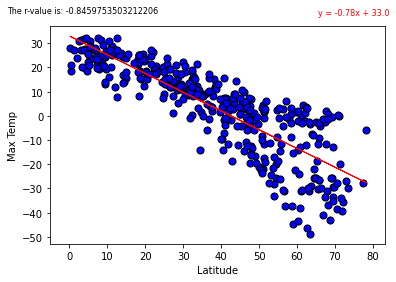

In [12]:
# Linear regression on Northern Hemisphere
y_variable = 'Max Temp'
create_plot(northern_hemi_df, y_variable)

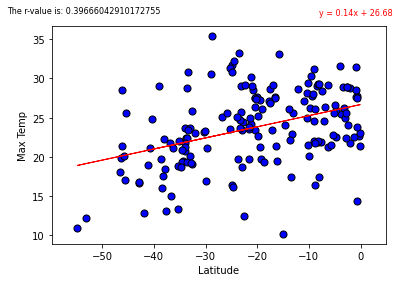

In [13]:
# Linear regression on Southern Hemisphere
y_variable = 'Max Temp'
create_plot(southern_hemi_df, y_variable)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

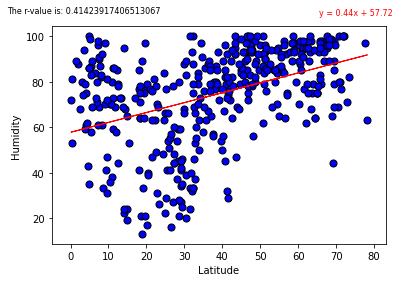

In [14]:
# Northern Hemisphere
y_variable = 'Humidity'
create_plot(northern_hemi_df, y_variable)

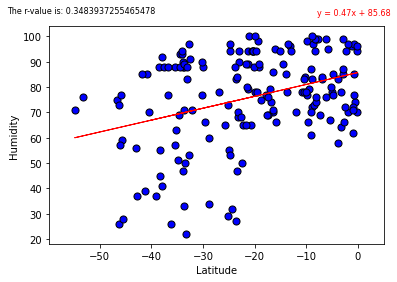

In [15]:
# Southern Hemisphere
y_variable = 'Humidity'
create_plot(southern_hemi_df, y_variable)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

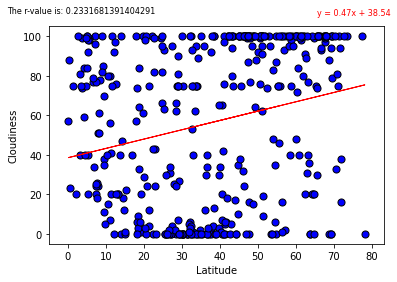

In [16]:
# Northern Hemisphere
y_variable = 'Cloudiness'
create_plot(northern_hemi_df, y_variable)

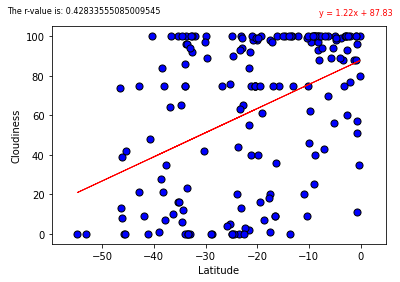

In [17]:
# Southern Hemisphere
y_variable = 'Cloudiness'
create_plot(southern_hemi_df, y_variable)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

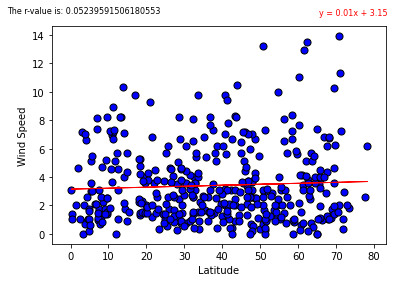

In [18]:
# Northern Hemisphere
y_variable = 'Wind Speed'
create_plot(northern_hemi_df, y_variable)

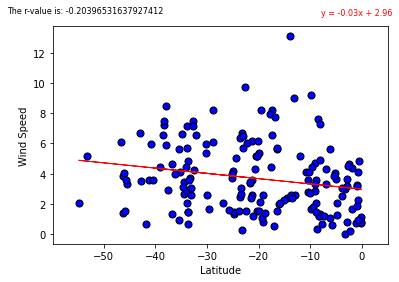

In [19]:
# Southern Hemisphere
y_variable = 'Wind Speed'
create_plot(southern_hemi_df, y_variable)

**Discussion about the linear relationship:** YOUR RESPONSE HERE